In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
folder   = "../dataset_v5/v5_2/v5_2_2/"

In [3]:
save_dir = "../graphs_v5_2_7_2/"

In [4]:
edges = pd.read_csv(folder+"final_shodhganga_dataset_v5_2_7_2.csv")

In [5]:
nodes = pd.read_csv(folder+"index_file2_v5_2_7_2.csv")

# Institute based motif analysis

In [6]:
nodes_inst = nodes.copy()

In [7]:
nodes_inst["inst"] = nodes['rid'].apply(lambda x : list(set(edges[(edges['advId']==x) | (edges['resId']==x)]['publisher_institution'].values))).copy()

In [8]:
nid_inst = dict(zip(nodes_inst['rid'], nodes_inst["inst"]))

In [9]:
#nid_inst

In [10]:
motif_3pt =  pd.read_csv("../../pattern/3-point_v5_2_7_2_id.csv")

In [11]:
motif_3pt.head()

,a.Id,b.Id,c.Id
0,35503,35518,35505
1,254683,50294,50332
2,144109,53418,53465
3,57951,57962,57990
4,67308,67328,67302


In [12]:
motif_3pt['a_inst'] = motif_3pt['a.Id'].map(nid_inst)
motif_3pt['b_inst'] = motif_3pt['b.Id'].map(nid_inst)
motif_3pt['c_inst'] = motif_3pt['c.Id'].map(nid_inst)

In [13]:
motif_3pt.sample(10)

,a.Id,b.Id,c.Id,a_inst,b_inst,c_inst
43,21862,21863,137779,[Jadavpur University],[Jadavpur University],[Jadavpur University]
171,67677,67644,227238,[Gauhati University],[Gauhati University],[Gauhati University]
218,86861,86872,267848,[Tezpur University],[Tezpur University],[Tezpur University]
153,64054,64101,219164,[Bharathidasan University],[Bharathidasan University],[Bharathidasan University]
178,67275,67291,226588,[University of Kerala],[University of Kerala],[University of Kerala]
156,66322,66327,224067,[North-Eastern Hill University],[North-Eastern Hill University],[North-Eastern Hill University]
96,42771,42797,177800,[Jaypee Institute of Information Technology],[Jaypee Institute of Information Technology],[Jaypee Institute of Information Technology]
15,4384,4379,102667,[Himachal Pradesh University],[Himachal Pradesh University],[Himachal Pradesh University]
113,144109,53445,199491,"[Alagappa University, University of Madras, Ka...",[Alagappa University],[Alagappa University]
217,86878,86856,267836,[Tezpur University],[Tezpur University],[Tezpur University]


In [14]:
motif_3pt['diff_inst'] = motif_3pt['a_inst']+motif_3pt['b_inst']+motif_3pt['c_inst']
motif_3pt['diff_inst_count'] = motif_3pt['diff_inst'].apply(lambda x : len(set(x)))

In [15]:
motif_3pt['diff_inst_count'].value_counts()

1    196
4     13
3      7
2      7
5      1
Name: diff_inst_count, dtype: int64

In [16]:
#motif_3pt[motif_3pt['diff_inst_count']==5].sample()

In [17]:
motif_uniq_3pt = motif_3pt[["a.Id","b.Id","c.Id"]]

In [18]:
b=[tuple(sorted(a)) for a in motif_uniq_3pt.values]

In [19]:
len(set(b))

224

In [20]:
motif_3pt['diff_inst_count'].value_counts()

1    196
4     13
3      7
2      7
5      1
Name: diff_inst_count, dtype: int64

In [21]:
check3p = motif_3pt[motif_3pt['diff_inst_count']==5].copy()

In [22]:
check3p

,a.Id,b.Id,c.Id,a_inst,b_inst,c_inst,diff_inst,diff_inst_count
118,144109,53418,199539,"[Alagappa University, University of Madras, Ka...","[Alagappa University, Manonmaniam Sundaranar U...","[Alagappa University, Periyar University]","[Alagappa University, University of Madras, Ka...",5


In [23]:
motif_4pt =  pd.read_csv("../../pattern/4-point_v5_2_7_2_id.csv")

In [24]:
motif_4pt.columns

Index(['a.Id', 'b.Id', 'c.Id', 'd.Id'], dtype='object')

In [26]:
#motif_uniq_4pt = motif_4pt[motif_4pt["diff_inst_count"]==2][["a.Id","b.Id","c.Id","d.Id"]]

In [27]:
#b=[tuple(sorted(a)) for a in motif_uniq_4pt.values]

In [28]:
#len(set(b))

In [29]:
motif_4pt['a_inst'] = motif_4pt['a.Id'].map(nid_inst)
motif_4pt['b_inst'] = motif_4pt['b.Id'].map(nid_inst)
motif_4pt['c_inst'] = motif_4pt['c.Id'].map(nid_inst)
motif_4pt['d_inst'] = motif_4pt['d.Id'].map(nid_inst)

In [30]:
motif_4pt['diff_inst'] = motif_4pt['a_inst']+motif_4pt['b_inst']+motif_4pt['c_inst']+motif_4pt['d_inst']
motif_4pt['diff_inst_count'] = motif_4pt['diff_inst'].apply(lambda x : len(set(x)))

In [31]:
motif_4pt['diff_inst_count'].value_counts()

1    50
2     6
Name: diff_inst_count, dtype: int64

In [32]:
motif_5pt =  pd.read_csv("../../pattern/5-point_v5_2_7_2_id.csv")

In [33]:
motif_5pt['a_inst'] = motif_5pt['a.Id'].map(nid_inst)
motif_5pt['b_inst'] = motif_5pt['b.Id'].map(nid_inst)
motif_5pt['c_inst'] = motif_5pt['c.Id'].map(nid_inst)
motif_5pt['d_inst'] = motif_5pt['d.Id'].map(nid_inst)
motif_5pt['e_inst'] = motif_5pt['e.Id'].map(nid_inst)

In [34]:
motif_5pt['diff_inst'] = motif_5pt['a_inst']+motif_5pt['b_inst']+motif_5pt['c_inst']+motif_5pt['d_inst']+motif_5pt['e_inst']
motif_5pt['diff_inst_count'] = motif_5pt['diff_inst'].apply(lambda x : len(set(x)))

In [35]:
# motif_5pt=motif_5pt[((motif_5pt['a.Id']==idd) | (motif_5pt['b.Id']==idd) | (motif_5pt['c.Id']==idd) | (motif_5pt['d.Id']==idd)
#               | (motif_5pt['e.Id']==idd))].copy()

In [36]:
# motif_uniq_5pt = motif_5pt[motif_5pt["diff_inst_count"]==2][["a.Id","b.Id","c.Id","d.Id","e.Id"]].copy()

In [37]:
#motif_5pt[motif_5pt["diff_inst_count"]==3][["a.Id","b.Id","c.Id","d.Id","e.Id"]]

In [38]:
#idd=24794

In [39]:
# motif_uniq_5pt_1 = motif_uniq_5pt[((motif_uniq_5pt['a.Id']==idd) | (motif_uniq_5pt['b.Id']==idd) | (motif_uniq_5pt['c.Id']==idd) | (motif_uniq_5pt['d.Id']==idd)
#               | (motif_uniq_5pt['e.Id']==idd))].copy()

In [40]:
motif_5pt['diff_inst_count'].value_counts()

1    268
2    124
3     42
4     34
5     14
Name: diff_inst_count, dtype: int64

In [41]:
#edges[edges['advId']==3119]

In [43]:
#freq3

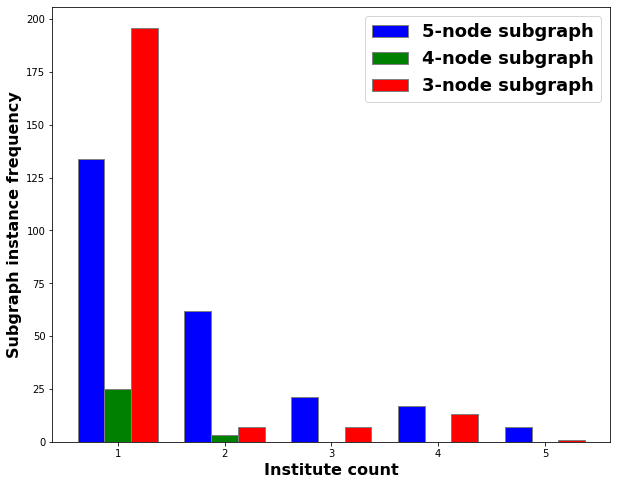

In [44]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 8))
 
# set height of bar
freq3 = [196,7,7, 13, 1]  # order changed in value counts
freq4 = list(motif_4pt['diff_inst_count'].value_counts().values/2)+[0,0,0]
freq5 = list(motif_5pt['diff_inst_count'].value_counts().values/2)
 
# Set position of bar on X axis
br1 = np.arange(len(freq3))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, freq5, color ='b', width = barWidth,
        edgecolor ='grey', label ='5-node subgraph')
plt.bar(br2, freq4, color ='g', width = barWidth,
        edgecolor ='grey', label ='4-node subgraph')
plt.bar(br3, freq3, color ='r', width = barWidth,
        edgecolor ='grey', label ='3-node subgraph')

# Adding Xticks
plt.xlabel('Institute count', fontweight ='bold', fontsize = 16)
plt.ylabel('Subgraph instance frequency', fontweight ='bold', fontsize = 16)
plt.xticks([r + barWidth for r in range(len(freq3))],
        ['1', '2', '3', '4', '5'])
 
plt.legend(prop={"size":18, "weight":"bold"})
plt.savefig(save_dir+"subgraph_inst_freq.pdf",bbox_inches='tight')
plt.show()

In [45]:
#edges["ddc_code"]

# DDC Based motif analysis

In [46]:
def map_ddc(ddc_code):
    mod_ddc_code = ''
    #print(ddc_code)
    if ddc_code:
        ddc_code = int(ddc_code)
        if ddc_code < 100:
            mod_ddc_code=0
        elif 100 <= ddc_code < 200:
            mod_ddc_code=100
        elif 200 <= ddc_code < 300:
            mod_ddc_code=200
        elif 300 <= ddc_code < 400:
            mod_ddc_code=300
        elif 400 <= ddc_code < 500:
            mod_ddc_code=400
        elif 500 <= ddc_code < 600:
            mod_ddc_code=500
        elif 600 <= ddc_code < 700:
            mod_ddc_code=600
        elif 700 <= ddc_code < 800:
            mod_ddc_code=700
        elif 800 <= ddc_code < 900:
            mod_ddc_code=800
        elif 900 <= ddc_code < 1000:
            mod_ddc_code=900
    return mod_ddc_code 

In [47]:
edges1                = edges.copy()
edges1["ddc_code"]    = edges1["ddc_code"].apply(lambda x : eval(x)[-1] if len(eval(x))>0 else '').copy()
edges1['ddc_code']    = edges1['ddc_code'].apply(lambda x : map_ddc(x))
nodes_ddc             = nodes.copy()
nodes_ddc["ddc_code"] = nodes['rid'].apply(lambda x : list(set(edges1[(edges1['advId']==x) | (edges1['resId']==x)]['ddc_code'].values))).copy()

In [48]:
inst_ddc = dict(zip(nodes_ddc["rid"],nodes_ddc["ddc_code"]))

In [49]:
motif_3pt_ddc = motif_3pt.copy()

In [50]:
motif_3pt_ddc['a_ddc']          = motif_3pt_ddc['a.Id'].map(inst_ddc)
motif_3pt_ddc['b_ddc']          = motif_3pt_ddc['b.Id'].map(inst_ddc)
motif_3pt_ddc['c_ddc']          = motif_3pt_ddc['c.Id'].map(inst_ddc)
motif_3pt_ddc['diff_ddc']       = motif_3pt_ddc['a_ddc']+motif_3pt_ddc['b_ddc']+motif_3pt_ddc['c_ddc']
motif_3pt_ddc['diff_ddc_count'] = motif_3pt_ddc['diff_ddc'].apply(lambda x : len(set(x)))

In [51]:
motif_3pt_ddc['diff_ddc_count'].value_counts()

1    214
2     10
Name: diff_ddc_count, dtype: int64

In [52]:
freq_ddc_3 = list(motif_3pt_ddc['diff_ddc_count'].value_counts().values)+[0,0]

In [53]:
motif_4pt_ddc = motif_4pt.copy()

In [54]:
motif_4pt_ddc['a_ddc']          = motif_4pt_ddc['a.Id'].map(inst_ddc)
motif_4pt_ddc['b_ddc']          = motif_4pt_ddc['b.Id'].map(inst_ddc)
motif_4pt_ddc['c_ddc']          = motif_4pt_ddc['c.Id'].map(inst_ddc)
motif_4pt_ddc['d_ddc']          = motif_4pt_ddc['d.Id'].map(inst_ddc)
motif_4pt_ddc['diff_ddc']       = motif_4pt_ddc['a_ddc']+motif_4pt_ddc['b_ddc']+motif_4pt_ddc['c_ddc']+motif_4pt_ddc['d_ddc']
motif_4pt_ddc['diff_ddc_count'] = motif_4pt_ddc['diff_ddc'].apply(lambda x : len(set(x)))

In [55]:
motif_4pt_ddc['diff_ddc_count'].value_counts()

1    56
Name: diff_ddc_count, dtype: int64

In [56]:
freq_ddc_4 = list(motif_4pt_ddc['diff_ddc_count'].value_counts().values/2)+[0,0,0]

In [57]:
motif_5pt_ddc = motif_5pt.copy()

In [58]:
motif_5pt_ddc['a_ddc']          = motif_5pt_ddc['a.Id'].map(inst_ddc)
motif_5pt_ddc['b_ddc']          = motif_5pt_ddc['b.Id'].map(inst_ddc)
motif_5pt_ddc['c_ddc']          = motif_5pt_ddc['c.Id'].map(inst_ddc)
motif_5pt_ddc['d_ddc']          = motif_5pt_ddc['d.Id'].map(inst_ddc)
motif_5pt_ddc['e_ddc']          = motif_5pt_ddc['e.Id'].map(inst_ddc)
motif_5pt_ddc['diff_ddc']       = motif_5pt_ddc['a_ddc']+motif_5pt_ddc['b_ddc']+motif_5pt_ddc['c_ddc']+motif_5pt_ddc['d_ddc']+motif_5pt_ddc['e_ddc']
motif_5pt_ddc['diff_ddc_count'] = motif_5pt_ddc['diff_ddc'].apply(lambda x : len(set(x)))

In [59]:
#motif_5pt_ddc[motif_5pt_ddc['diff_ddc_count']==2]

In [60]:
motif_5pt_ddc['diff_ddc_count'].value_counts()

1    438
2     30
3     10
4      4
Name: diff_ddc_count, dtype: int64

In [61]:
freq_ddc_5 = list(motif_5pt_ddc['diff_ddc_count'].value_counts().values/2)

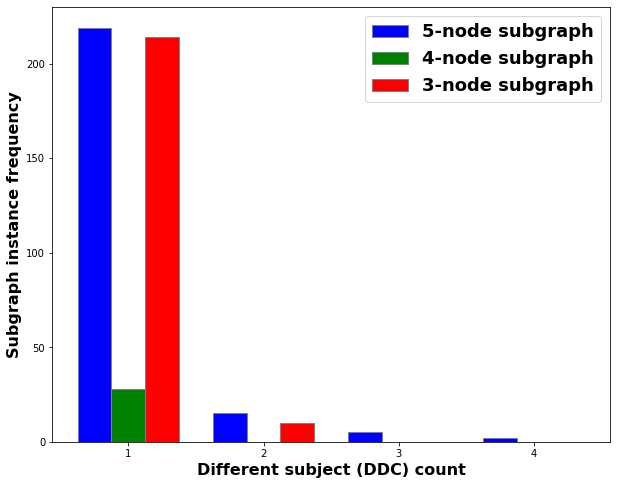

In [64]:
barWidth = 0.25
fig = plt.subplots(figsize =(10, 8))


br1 = np.arange(len(freq_ddc_5))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 

plt.bar(br1, freq_ddc_5, color ='b', width = barWidth,
        edgecolor ='grey', label ='5-node subgraph')
plt.bar(br2, freq_ddc_4, color ='g', width = barWidth,
        edgecolor ='grey', label ='4-node subgraph')
plt.bar(br3, freq_ddc_3, color ='r', width = barWidth,
        edgecolor ='grey', label ='3-node subgraph')

# Adding Xticks
plt.xlabel('Different subject (DDC) count', fontweight ='bold', fontsize = 16)
plt.ylabel('Subgraph instance frequency', fontweight ='bold', fontsize = 16)
plt.xticks([r + barWidth for r in range(len(freq_ddc_5))],
        ['1', '2', '3','4'])
 
plt.legend(prop={"size":18, "weight":"bold"})
plt.savefig(save_dir+"subgraph_ddc_freq.pdf", bbox_inches='tight')
plt.show()

In [72]:
#freq_ddc_4

In [54]:
edges.columns

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'title', 'thesisId',
       'N_thesisId', 'date_submitted', 'new_date_awarded', 'dc.date.awarded',
       'dc.subject.ddc', 'uniq_ddc_across_dept', 'dc.description.abstract',
       'dc.title.alternative', 'N_DepartmentId_1', 'ddc_code', 'advisor_advId',
       'researcher_resId'],
      dtype='object')

In [15]:
edges[edges['advId']==144109]['advisor_name'].value_counts()

Mohan, S.    126
Mohan S.       1
S, Mohan       1
Name: advisor_name, dtype: int64

In [18]:
edges[edges['advId']==144109]['title'].values

array(['Effect of metacognitive orientation and attention activation on students_achievement in science',
       'Teacher morale and student morale at secondary level in Dindigul Anna District of Tamilnadu',
       'Role_performance of special education teachers',
       'Unitary University educational management_a suggestive framework for operational efficiency',
       'Effect of cognitive modeling on learning mathematics',
       'Design and Evaluation of Induction Training Program for the Engineers of Highways Department of Tamil Nadu',
       'Financial management in primary education in Chennai municipal corporation schools',
       'Metacognitive orientation in learning English poetry among undergraduate second language learners',
       'Prophet Muhammad as a teacher',
       'Managerial roles performance by the heads of schools',
       'An impact of sarva shiksha abhiyan on access_enrolment_retention_dropout and achievement in elementary education at Dharmapuri District',
   

In [20]:
edges[edges['advId']==144109]['publisher_dept'].value_counts()

department of education                          126
department of engineering education                1
department of economics and rural development      1
Name: publisher_dept, dtype: int64

In [33]:
edges[edges['advisor_name']=="Hiremath, R. C."]['title'].values

array(['A grammar of Vachana literature',
       'Janapada vagatugalu vimarsatmaka adhyayana',
       'Shravana Belagola Rajakeeya sahityika sanskruthika mahatwa',
       'Kavirajmarg parisarada Kannada sahitya',
       'Kannada sangatya sahitya', 'Nemichandra Kavi Kavya vimarsha',
       'Harihara kaviya stree patra darshan',
       'Kannada sahityadalli allam prabhudevaru',
       'Viakarni Eradaneya Nagaverma',
       'Linguistic analysis of colloquial Kannada in Bidar district',
       'The Christian Konkani of South Kanara a Linguistic analysis',
       'Kesirajas Sabdamani Darpana a linguistic analysis',
       'Kumaravyasana patra srusti', 'Hosagannada sahityada udayakala',
       'Galaganatharu mattu avar kadambarigalu',
       'Ambikatanayadattar bhavageetegalu',
       'Puliger Aithihasik sahitya mattu sankruitika mahatva',
       'Keladiya Arasaru mattu Kannda sahitya',
       'Kannada sahityadalli veerarasa',
       'Hariharana vyaktitva hagu kavitva',
       'Kanakadasaru 

In [30]:
edges[edges['advId']==88399]['publisher_institution'].value_counts()

Dr. Babasaheb Ambedkar Marathwada University    62
Name: publisher_institution, dtype: int64

In [25]:
edges[edges['advId']==88399][['advisor_name','publisher_dept']].value_counts()

advisor_name       publisher_dept       
Nagbhushanam       department of zoology    22
Nagbhushanam,      department of zoology    18
Nagabhushanam, R.  department of zoology     8
Nagbhushanam, R.   department of zoology     3
Nagbhushnam        department of zoology     2
Nagabhushanam,     department of zoology     2
Nagabhushanam      department of zoology     2
Nagbhushanam       department of botany      1
Nagabhushnam       department of zoology     1
Nagabhushanam, R.  department of botany      1
Nagabhushanam, R,  department of zoology     1
                   department of physics     1
dtype: int64

In [29]:
edges[edges['advId']==88399]['title'].values

array(['Biology of fresh water mussel parreysia corrugata',
       'Studies on colour changes in the prawn macrobrachium kistnensis',
       'Study on the biology of marine clam katelysis opima',
       'Studies On Biochemical Ecology Of Indian Leech poecilobdella',
       'Biology of slug',
       'Some aspects of endocrinology of fresh water prawn caridina weheri',
       'Effect of Cadmium Cholride on the Physiology of Freshwater Prawn Macrbrachium Kistnensis (1992-11-24)',
       'Some aspects of physiology of Indian earthworm',
       'Studies on biology of some decapod crustace of thanacreek',
       'Biological studies of clam paphia laterisulca',
       'Studies on the biology of indoplan orbis exustus',
       'some aspects of physiology of hermit crab clibanarius arethu',
       'studies on some physiological aspects and control of snail melanoides tuberculatus',
       'Some aspects of the biology of snail gyraulus',
       'Physiology of colour changes in tropical fish lepi